This implementation is from group 11, composed by:

- Carolina Vitorino 86394
- João Barata 86450
- Tiago Mesquita 86520


This Notebook showcases the functional part of the second delivery. In each section we  present the function and a set of outputs. After each funtion we will mention the structure and the meaning of each input and output. Alternatively, you can include a standard function signature


In [1]:
%%javascript
// IPython.OutputArea.auto_scroll_threshold = 9999;

3 - Graph IR System

In [2]:
import graphIR as graph

#(a)

#build_graph(D,sim,$\theta$,args) (your implementation)

graph.FUNCTIONALITY = 'a'
graph.main()

#graph = build_graph(docs['test'], sim=cosine_similarity, th=THRESHOLD)
#print("graph nodes:", graph.nodes)

Directory "rcv1" already exists, no extraction needed.


[nltk_data] Downloading package wordnet to C:\Users\Tiago
[nltk_data]     Mesquita\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
READING QRELS       : 100%|██████████| 37556/37556 [00:00<00:00, 1121092.05it/s]




PARSING TRAIN SET...
rcv1_eval_train.json found, loading them...


PARSING TEST SET...
rcv1_eval_test.json found, loading them...
Classification results already exist, loading from file ("classification_results/eval_mlp_tf-idf.json")...
graph nodes: ['105780', '106287', '106455', '110886', '117182', '119150', '120390', '120406', '121043', '124025', '124921', '125475', '133961', '134445', '151221', '152376', '154699', '154700', '154738', '154758', '155488', '155528', '155548', '155572', '166939', '167306', '169979', '170614', '177044', '177049', '177059', '177087', '177089', '177290', '177319', '177364', '177644', '177661', '177662', '177664', '186737', '197112', '197235', '197777', '197943', '203547', '203698', '210140', '210339', '213148', '213174', '213257', '213507', '214554', '215234', '215314', '216068', '217359', '217627', '217898', '218339', '221116', '221126', '221237', '221267', '221364', '221378', '221968', '221983', '222022', '222027', '222908', '223076', '223082', '223421

__@input:__

__D__: *dict* w/ structure:

    {
        "itemid": {
            "headline": "(headline text)",
            "p": "(p text)",
            "dateline": "(dateline text)",
            "byline": "(byline text)"
        },
        ...
    }

__args:__
* __similarity__: *Cosine Similarity*;
* __theta__: *0.5*


__@output:__

**graph**: graph with nodes representing documents;

In [3]:
#(b)

#undirected_page_rank(q,I,k,args)

graph.FUNCTIONALITY = 'b'
graph.TOPIC = 'R101'
graph.main()

#pr_values = undirected_page_rank(classification_results[TOPIC], D=docs['test'], p=10, sim=cosine_similarity,
                                             #th=threshold, priors = 'classification')
#print({TOPIC: pr_values})'''

Directory "rcv1" already exists, no extraction needed.


READING QRELS       : 100%|██████████| 37556/37556 [00:00<00:00, 1043228.74it/s]



PARSING TRAIN SET...
rcv1_eval_train.json found, loading them...


PARSING TEST SET...
rcv1_eval_test.json found, loading them...


Classification results already exist, loading from file ("classification_results/eval_mlp_tf-idf.json")...
{'R101': {'vanilla_pk': {'244000': 0.004334010124773836, '218339': 0.004243543838241799, '225231': 0.004188730351672025, '234473': 0.004158287975653182, '256001': 0.004103989839984717, '240223': 0.004098176551505671, '229439': 0.004096465736658956, '243773': 0.0040857245572182305, '197112': 0.004061262504890105, '228774': 0.004050468761291216}, 'extended_pk': {'244000': 0.006154582212365959, '218339': 0.006139063766001171, '225231': 0.005936980867377964, '214554': 0.005858344284742219, '243773': 0.005838171503637826, '243766': 0.005830932923590519, '197112': 0.005774247889795474, '225431': 0.005765325490590679, '256001': 0.00574961233667473, '234473': 0.005747846699621292}}}


__@input:__

__q__ is a string representing a document

__D__: *dict* w/ structure:

    {
        "itemid": {
            "headline": "(headline text)",
            "p": "(p text)",
            "dateline": "(dateline text)",
            "byline": "(byline text)"
        },
        ...
    }
    
__p__ is an integer representing the top-p documents retrieved & respective ranks

* __similarity__: *Cosine Similarity*;
    
* __theta__: *0.5*
    
__args__:

* 
__priors__: string representing the type of priors *classification* or *baseline*, where the classification priors represent the scores from the classifier of section 2 and the baseline represent a BM25 normalized ranking score from first delivery.

__@output__: dictionary with 2 keys *vanilla* and *extended_pk*, with the top-p scores for each key.

Further functionalities to answer the report questions:

- #### Graph

- Question a)

Directory "rcv1" already exists, no extraction needed.


READING QRELS       : 100%|██████████| 37556/37556 [00:00<00:00, 1088553.29it/s]



PARSING TRAIN SET...
rcv1_eval_train.json found, loading them...


PARSING TEST SET...
rcv1_eval_test.json found, loading them...


Classification results already exist, loading from file ("classification_results/eval_mlp_tf-idf.json")...

Evaluating models with preprocessing: stemming_stopwords...


C:\Users\Tiago\OneDrive - Universidade de Lisboa\IST\PRI\repo\PRI\project\main.py:116: UserWarning: Skiping indexing, errors will be thrown if checkpoints don't exist
  warnings.warn("Skiping indexing, errors will be thrown if checkpoints don't exist")


Indexing time:      0.001s, Indexing space:     87.039mb

Evaluating model with scoring: BM25_k1_2,00_b_1,00...
Ranking results already exist, loading from file ("ranking_results/test_stemming_stopwords_BM25_k1_2,00_b_1,00.json")...


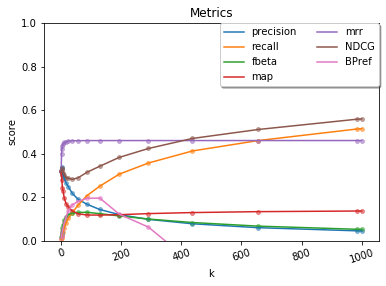

CLASSIFYING R101    :   0%|          | 0/100 [00:00<?, ?it/s]

Retrieval results don't exist, retrieving with model...


CLASSIFYING R101    :   0%|          | 0/100 [00:00<?, ?it/s]          

Retrieval results don't exist, retrieving with model...


CLASSIFYING R153    :  52%|█████▏    | 52/100 [00:51<00:46,  1.03it/s]

In [ ]:
import main as p1

graph.QUESTION = 'a'
graph.FUNCTIONALITY = None
graph.main()

#compare_graph_to_baseline(docs['test'], topics, topic_index, threshold, priors = 'baseline')
#
#        graph_results_vanilla = get_pk_results(classification_results, docs['test'], topics, topic_index,
#                                               type='vanilla', threshold = threshold, priors = 'baseline')
#
#        graph_results_extended = get_pk_results(classification_results, docs['test'], topics, topic_index,
#                                               type='extended', threshold=threshold, priors='baseline')
#
#        plot_statistics_for_graph(graph_results_vanilla, pk_type='Vanilla')
#        plot_statistics_for_graph(graph_results_extended, pk_type='Personalized')

- Question b)

In [ ]:
graph.QUESTION = 'b'
graph.FUNCTIONALITY = None
graph.main()


# th_variation_no_priors = plot_variation_threshold(classification_results, docs['test'], topics, topic_index,
#                                                  pk_type='vanilla', priors = 'classification')
#
#        th_variation_priors = plot_variation_threshold(classification_results, docs['test'], topics, topic_index,
#                                                pk_type='extended_pk', priors= 'classification')
#
#        plot_iap_for_models(th_variation_no_priors)
#        plot_iap_for_models(th_variation_priors)



- Question c) 

In [ ]:
graph.QUESTION = 'c'
graph.FUNCTIONALITY = None
graph.main()


# print("Question c: \n")
#        plot_avg_centrality(docs['test'], sim=cosine_similarity, th=THRESHOLD)

- Question d)

In [ ]:
graph.QUESTION = 'd'
graph.FUNCTIONALITY = None
graph.main()

#   graph_results_vanilla = get_pk_results(classification_results, docs['test'], topics, topic_index,
#                                               type='vanilla', threshold=THRESHOLD, priors = 'baseline')
#        graph_results_personalized = get_pk_results(classification_results, docs['test'], topics, topic_index,
#                                                    type='extended', threshold=THRESHOLD, priors = 'baseline')
#        plot_iap_for_models({'vanilla': graph_results_vanilla, 'personalized': graph_results_personalized})
#

#Further functionalities implemented if thats the case

#text processing options (e.g. absence versus presence of phrase extraction); 
# IR models (including the Boolean, TF-IDF and BM25 models).

- Question d)

In [ ]:
graph.QUESTION = 'd'
graph.FUNCTIONALITY = None
graph.main()

#   graph_results_vanilla = get_pk_results(classification_results, docs['test'], topics, topic_index,
#                                               type='vanilla', threshold=THRESHOLD, priors = 'baseline')
#        graph_results_personalized = get_pk_results(classification_results, docs['test'], topics, topic_index,
#                                                    type='extended', threshold=THRESHOLD, priors = 'baseline')
#        plot_iap_for_models({'vanilla': graph_results_vanilla, 'personalized': graph_results_personalized})
#

#Further functionalities implemented if thats the case

#text processing options (e.g. absence versus presence of phrase extraction); 
# IR models (including the Boolean, TF-IDF and BM25 models).

- Question d)

In [ ]:
QUESTION = 'd'

#Further functionalities implemented if thats the case

#text processing options (e.g. absence versus presence of phrase extraction); 
# IR models (including the Boolean, TF-IDF and BM25 models).

- Question d)

In [ ]:
#Further functionalities implemented if thats the case

#text processing options (e.g. absence versus presence of phrase extraction); 
# IR models (including the Boolean, TF-IDF and BM25 models).

__@input:__ and __@output__ of each funtion